In [1]:
# depth를 끝까지 주었을 때

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.937


In [2]:
# max_depth 지정 시 과대적합을 방지 할 수 있음

tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.951


### 결정 트리 분석

graphbiz를 이용한 트리의 시각화

In [3]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["악성", "양성"],
               feature_names=cancer.feature_names, impurity=False, filled=True)

In [21]:
import graphviz
from IPython import display

with open("tree.dot", encoding='UTF-8') as f:
    dot_graph = f.read()

In [22]:
# graphviz.Source(dot_graph)

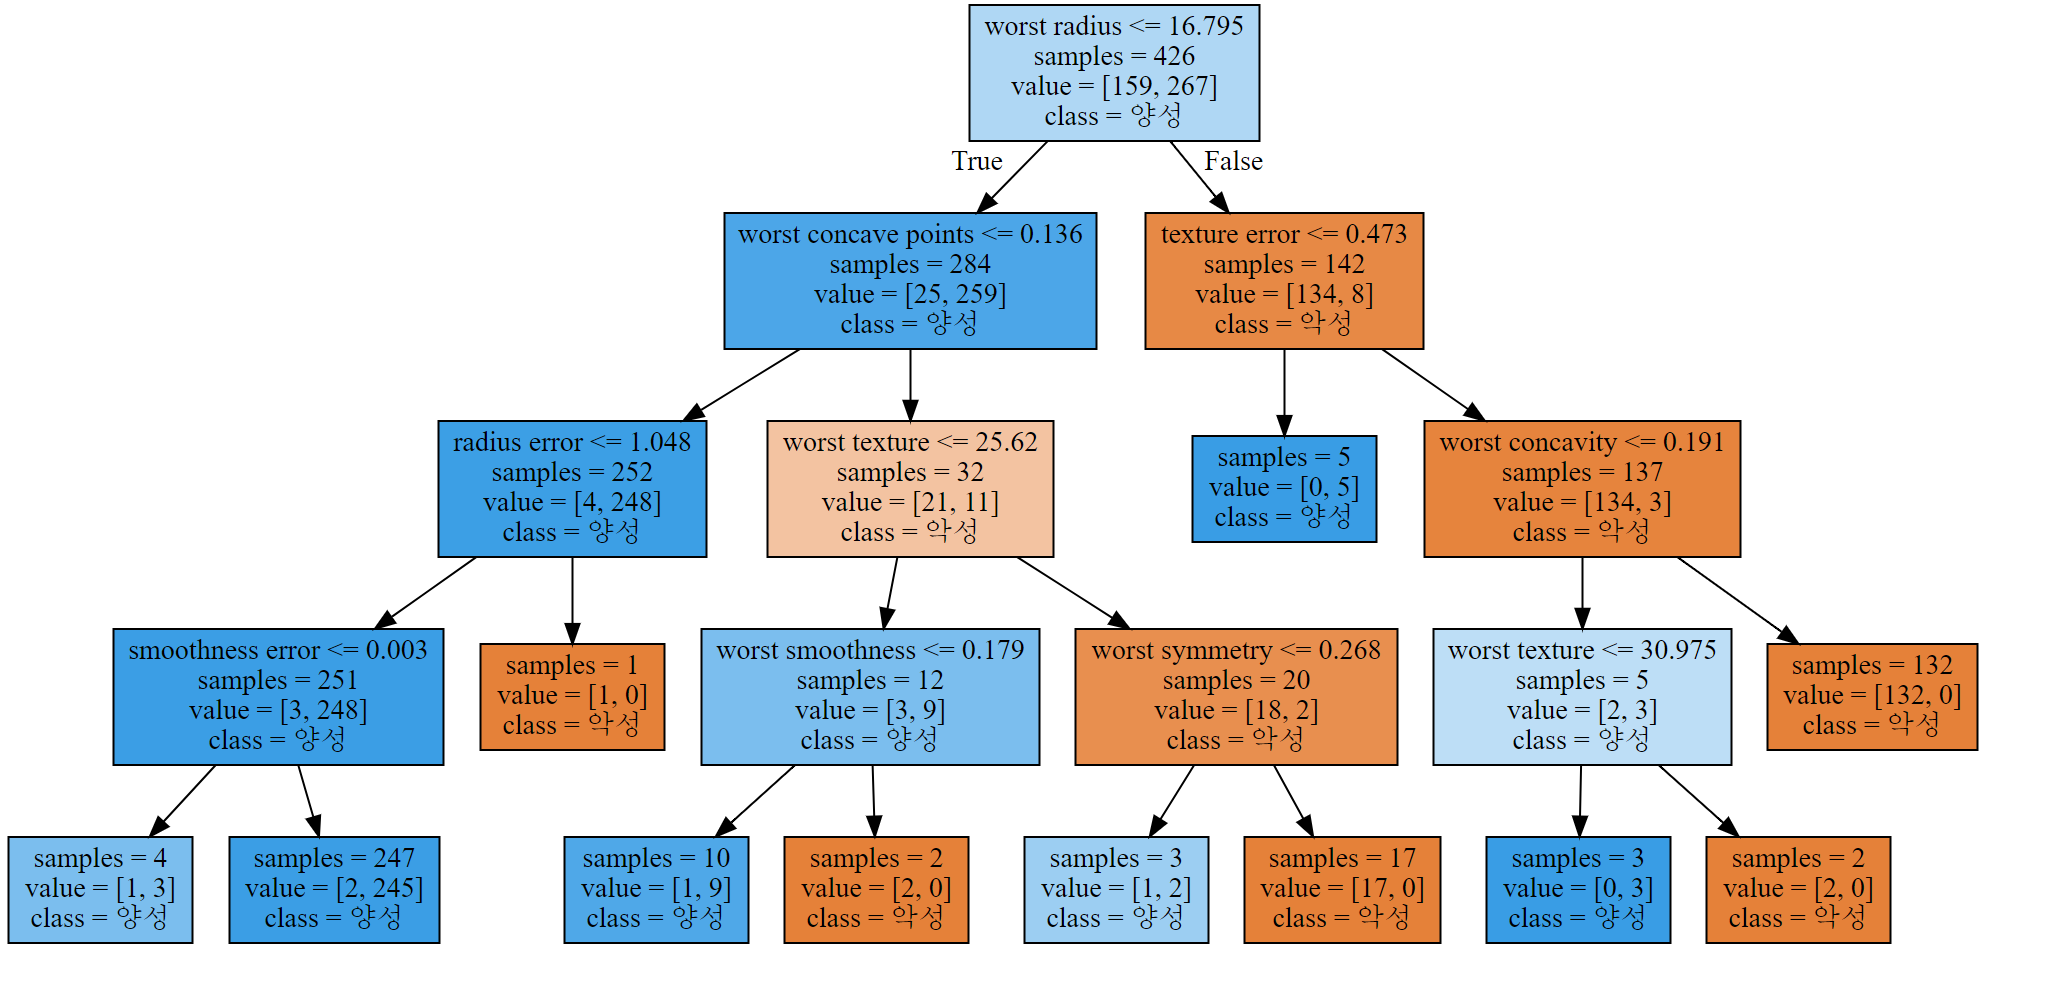

### 특성 중요도 
전체 합은 1이며, 0은 전혀 사용되지 않았고, 1은 완벽하게 타깃 클래스를 예측했다는 뜻

In [23]:
print("특성 중요도:\n", tree.feature_importances_)

AttributeError: 'Source' object has no attribute 'feature_importances_'

In [24]:
import matplotlib.pyplot as plt 
import numpy as np

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

AttributeError: 'Source' object has no attribute 'feature_importances_'

Feature importances: [0. 1.]


TypeError: 'module' object is not callable

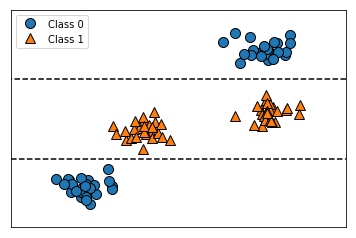

In [25]:
import mglearn
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

Text(0, 0.5, '가격 ($/Mbyte)')

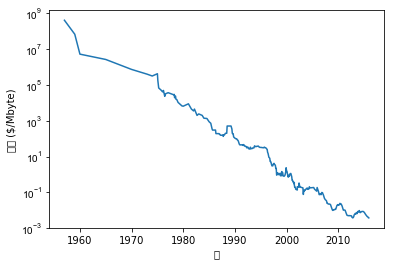

In [28]:
# 컴퓨터 메모리 가격 동향 데이터셋
# x - 날짜, y - 해당 년도의 램(RAM)

import pandas as pd
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.yticks(fontname = "Arial") # 한글 폰트가 지수에 음수를 표시하지 못하므로 ytick의 폰트를 바꾸어 줍니다.
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte)")

`DecisionTreeRegressor`과 `LinearRegression`의 비교

In [41]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 만듭니다
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 가격 예측을 위해 날짜 특성만을 이용합니다
X_train = data_train.date[:, np.newaxis]
# 데이터와 타깃 사이의 관계를 간단하게 만들기 위해 로그 스케일로 바꿉니다
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
# max_depth=4 정도가 되게 잘 나오넴
linear_reg = LinearRegression().fit(X_train, y_train)

# 예측은 전체 기간에 대해서 수행합니다
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 예측한 값의 로그 스케일을 되돌립니다
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

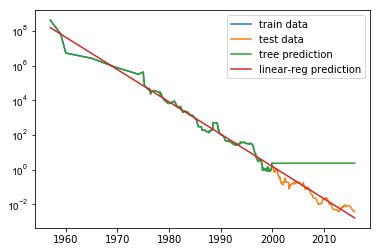

In [42]:
plt.yticks(fontname = "Arial") # 한글 폰트가 지수에 음수를 표시하지 못하므로 ytick의 폰트를 바꾸어 줍니다.
plt.semilogy(data_train.date, data_train.price, label="train data")
plt.semilogy(data_test.date, data_test.price, label="test data")
plt.semilogy(ram_prices.date, price_tree, label="tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="linear-reg prediction")
plt.legend()

#### 트리는 훈련데이터를 완벽하게 예측
-> 복잡도에 제한을 두지 않았기 때문

하지만 범위 밖으로 나가면 마지막 포인트를 이용해 예측하는게 전부, 따라서 훈련데이터 밖의 새로운 데이터를 예측할 능력이 없음.

### 결정트리의 장단점과 매개변수

결정 트리의 장점은 2가지
- 만들어진 모델을 시각화 하기 쉽기 때문에 비전문가도 이해하기 수월
- 데이터의 스케일에 구애받지 않음
각 특성이 개별적으로 처리되어 데이터를 분할하는데 데이터 스케일의 영향을 받지 않으므로 결정 트리에서는 특성의 정규화나 표준화 같은 전처리 과정이 필요없음. 특히 특성의 스케일이 서로 다르거나 이진 특성과 연속적인 특성이 혼합되어 있을 때도 잘 작동.

결정 트리의 단점은 사전 가지치기를 사용함에도 불구하고 과대적합되는 경향이 있어, 일반화 성능이 좋지 않다는 것

이를 해결하기 위해 앙상블 사용

## 결정 트리의 앙상블
`앙상블`은 여러 머신러닝 모델을 연결하여 더 강력한 모델은 만드는 기법

주로
- 랜덤 포레스트
- 그레이디언트 부스팅

# 랜덤 포레스트
결정트리의 `과대적합`을 해결하기 위해 고안
- 조금씩 다른 여러 결정 트리의 묶음
- 과대적합된 트리를 많이 만들어 평균을 냄
- 결정트리를 많이 만들어야 하는데, 각 트리는 타깃 예측 성능이 좋아야하며, 다른 트리와는 구별되어야함.

- 랜덤 포레스트는 트리들이 달라질 수 있도록 무작위성을 주입
    - 트리를 만들 때 데이터포인트를 무작위로 선택
    - 분할 테스트에서 특성을 무작위로 선택

### 랜덤 포레스트를 만들 때 10개의 트리가 필요하다고 하면!
일단, 데이터의 부트스트랩 샘플을 추출

몇 개의 특성을 고를지는 max_features 매개변수로 조정

max_features = 1 로 설정하게 되면 트리이 분기는 테스트할 특성을 고를 필요가 없게 되며 그냥 무작위로 선택한 특성의 임계값을 찾기만 하면 된다.

#### two moon 데이터셋을 가지고 트리 5개로 구성된 랜덤 포레스트 모델 만들기

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

In [46]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

랜덤 포레스트 안에 만들어진 트리는 estimators_ 속성에 저장됨.

각 트리에서 학습된 결정경계와 이를 취합해 만든 결정 경계를 함께 시각화 해보자(below)

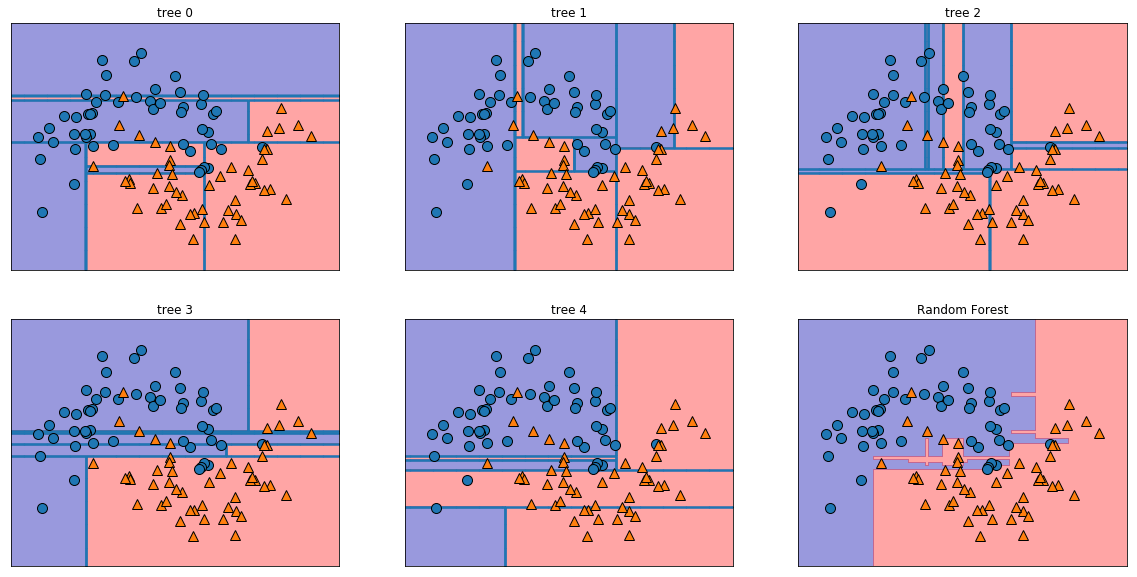

In [48]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("tree {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

### 유방암 데이터셋에 100개의 트리로 이루어진 랜덤 포레스트

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


위 결과 처럼 랜덤 포레스트는 아무런 매개변수 튜닝 없이도 선형 모델이나 단일 결정 트리보다 높은 97%의 정확도를 내고 있음.

- 사전 가지치기를 할 수도 있지만 안해도 꽤 좋은 성능
- 결정 트리처럼 랜덤 포레스트도 각 트리의 특성 중요도를 취합해서 계산할 수 있음

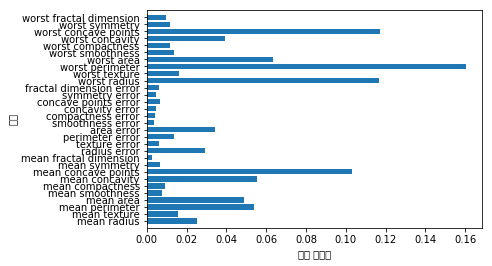

In [50]:
plot_feature_importances_cancer(forest)

그림에서 알 수 있듯이, 단일 포레스트보다 랜덤 포레스트에서 훨씬 많은 특성이 0 이상의 중요도 값을 가짐.

-> 더 넓은 시각으로 데이터를 바라볼 수 있음

### 랜덤 포레스트의 장단점과 매개변수
회귀와 분류에 있어서 랜덤 포레스트는 현재 가장 널리 사용되는 머신러닝 알고리즘.

- 성능이 기본적으로 뛰어남
- 매개변수 튜닝을 많이 하지 않아도 잘 작동
- 데이터의 스케일을 맞출 필요 없음

랜덤 포레스트 훈련할 때 시간이 꽤 걸리므로 CPU 사용 수를 정하려면 `n_jobs` 매개변수를 활용하면 됨.

랜덤 포레스트는 텍스트 데이터 같이 매우 차원이 높고 희소한 데이터에는 잘 작동하지 않음. 이런 데이터에는 선형모델이 더 적합.

랜덤 포레스트는 매우 큰 데이터셋에도 잘 작동하며 훈련은 여러 CPU 코어로 간단하게 병렬화 시킬 수 있음.

하지만 랜덤 포레스트는 선형 모델보다 많은 메모리를 사용하며 훈련과 예측이 느림.

속도와 메모리 사용에 제약이 있는 어플리케이션이라면 선형 모델이 적합할 수 있음.

#### 중요 매개변수
- n_estimators(클 수록 좋음, 더 많은 트리를 평균하면 과대적합 줄어듦, but 메모리와 훈련시간 길어짐)
- max_features(각 트리가 얼마나 무작위가 될지를 결정, 작은 max_feature은 과대적합을 줄여줌. 일반적으로 기본값을 쓰는 것이 좋음.)
- max_depth(사전 가지 치기)

# 그레디언트 부스팅 회귀 트리
앙상블, 역시 여러 개의 결정 트리를 묶어 강력한 모델을 만드는 방법.

이름이 회귀지만 회귀와 분류 모두에 사용할 수 있음.

랜덤 포레스트와 다른 점은, 

그레디언트 부스팅은 이전 트리의 오차를 보와하는 방식으로 순차적으로 트리를 만듦.

그래서 `무작위성`이 없다.

대신 강력한 사전 가지치기가 사용되는데 ,그레디언트 부스팅 트리는 보통 1~5 정도의 깊지 않은 트리를 사용하므로 메모리를 적게 사용하고 예측도 빠릅니다.

그레이디언트 부스팅의 근본 아이디어는 이런 얕은 트리같은 간단한 모델에 적합

#### `약한 학습기`라고도 한다.

트리가 많이 추가될 수록 성능은 당근 좋아짐.

랜덤 포레스트보다는 매개변수 설정에 조금 더 민감, but 잘 조정하면 더 높은 정확도를 제공.

특별하게 이전 트리의 오차를 얼마나 강하게 보정할 것인지 제어하는 `learning_rate` 매개변수가 있다.

학습률이 크면 트리는 보정을 강하게 하기 때문에 복잡한 모델을 만듦.

n_estimators 값을 키우면 앙상블에 트리가 더 많이 추가되어 모델의 복잡도가 커지고, 훈련세트에서의 실수를 바로잡을 기회가 더 많아짐.

In [51]:
# 유방암 데이터셋을 이용해 그레디언트 부스팅 분류기 사용

In [52]:
# 기본값인 깊이가 3인 트리 100개와 학습률 0.1을 사용
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.965


In [54]:
# 과대적합 된 것 같다. 과대적합을 막기 위해서 트리의 최대 깊이를 줄여, 
# 사전 가지치기를 강하게 하거나 학습률을 낮추자!

In [55]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.972


In [56]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.965


위 두 방식은 모델의 복잡도를 감소시키므로 훈련세트의 정확도가 낮아짐.

- (아래) 학습률을 낮추는 것은 테스트 세트의 성능을 조금밖에 개선하지 못했지만
- (위) 트리의 최대 깊이를 낮추는 것은 모델 성능 향상에 크게 기여했음.

트리를 100개 사용했으므로 깊이가 1이더라도 모든 트리를 분석하긴 쉽지 않음.

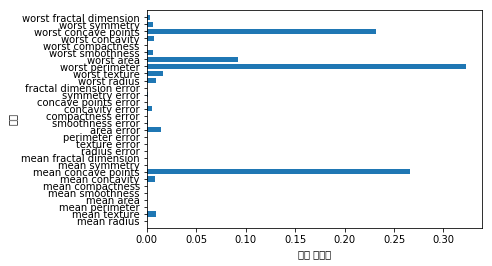

In [59]:
# 특성 중요도
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

그레디언트 부스팅 트리의 `특성 중요도` 그래프가 랜덤 포레스트와 비슷한 특성을 강조하고 있음.

하지만! 차이점이 있다면 일부 특성을 완전히 무시하고 있음.

### 보통..!
보통 안정적인 랜덤 포레스트를 먼저 적용하곤 한다.

랜덤 포레스트가 잘 작동하더라도 예측 시간이 중요하거나 머신러닝 모델에서 마지막 성능까지 쥐어짜야 할 때 그레디언트 부스팅을 사용하면 도움이 된다.

대규모 머신러닝 문제에 그레디언트 부스팅을 적용하려면 
- xgboost 패키지와
- 파이썬 인터페이스
를 검토해보는 것이 좋음.
위 두가지가 빠르고 튜닝이 쉽다함.

### 장단점과 매개변수
단점: 매개변수를 잘 조정해야함, 훈련 시간이 김.

다른 트리 기반 모델 처럼 특성의 스케일을 조정하지 않아도 되고 이진 특성이나 연속적인 특성에도 잘 동작함.

그리고 트리 기반 모델의 특성상 희소한 고차원 데이터에는 잘 작동안함(텍스트 같은)

#### 중요 매개변수
- n_estimators(트리의 개수 지정)
- learning_rate(이전 트리의 오차를 보정하는 정도 조정)

만약 learning_rate를 낮춘다면 비슷한 복잡도의 모델을 만들기 위해 더 많은 트리를 추가해야함.

n_estimators가 클 수록 좋은 랜덤 포레스트와는 달리 그레디언트 부스팅에서 n_estimators를 크게하면 모델이 복잡해지고 과대적합될 가능성이 높아짐.

> 일반적으로 가용한 시간과 메모리 한도에서 n_estimators를 맞추고 나서 적절한 learning_rate를 찾음.

조기 종료를 위한 n_iter_no_change와 validation_fraction이 있음.

반복 동안 검증 점수가 향상되지 않으면 훈련이 종료되고 기본값인 None으로 세팅되어 있으면 조기 종료 X

마지막으로 max_depth를 매우 작게 설정하며 트리의 깊이가 5보다 깊어지지 않게 함!

In [65]:
!git push origin master

To https://github.com/Tedhoon/scikit-learn.git
   fcbdc3a..20a0be7  master -> master
